# Table of Contents
 <p><div class="lev1"><a href="#The-plan"><span class="toc-item-num">1&nbsp;&nbsp;</span>The plan</a></div><div class="lev1"><a href="#Re-Wrangling"><span class="toc-item-num">2&nbsp;&nbsp;</span>Re-Wrangling</a></div><div class="lev1"><a href="#All-the-variables"><span class="toc-item-num">3&nbsp;&nbsp;</span>All the variables</a></div><div class="lev1"><a href="#Bivariate-visualizations-of-each-combination-of-variables"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bivariate visualizations of each combination of variables</a></div><div class="lev1"><a href="#Pair-plots"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pair plots</a></div>

In [1]:
# must go first 
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# system packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling 
import numpy as np
import pandas as pd

# eda tools 
import missingno as msno
import pandas_profiling

# interactive 
import ipywidgets as widgets

# more technical eda
import sklearn
import scipy

In [2]:
from aqua_helper import *

In [3]:
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':16,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

# The plan 

Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step. You may want to do all the steps for a subset of the variables first or you might jump back because you learned something and need to have another look. 

1. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data 
5. Explore each individual variable in the dataset 
6. Assess the relationship between each variable and the target 
7. **Assess interactions between variables** 
8. Explore data across many dimensions 

Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 


# Re-Wrangling 

In [4]:
data = pd.read_csv('aquastat.csv.gzip', compression='gzip')

# simplify regions
data.region = data.region.apply(lambda x: simple_regions[x])

# remove exploitable fields and national rainfall index
data = data.loc[~data.variable.str.contains('exploitable'),:]
data = data.loc[~(data.variable=='national_rainfall_index')]

# Uncomment to print out variable names and explanations
# data[['variable','variable_full']].drop_duplicates()

# Subset for cross-sectional analysis
recent = time_slice(data, '2013-2017')

# All the variables

In [5]:
corr = recent.corr()

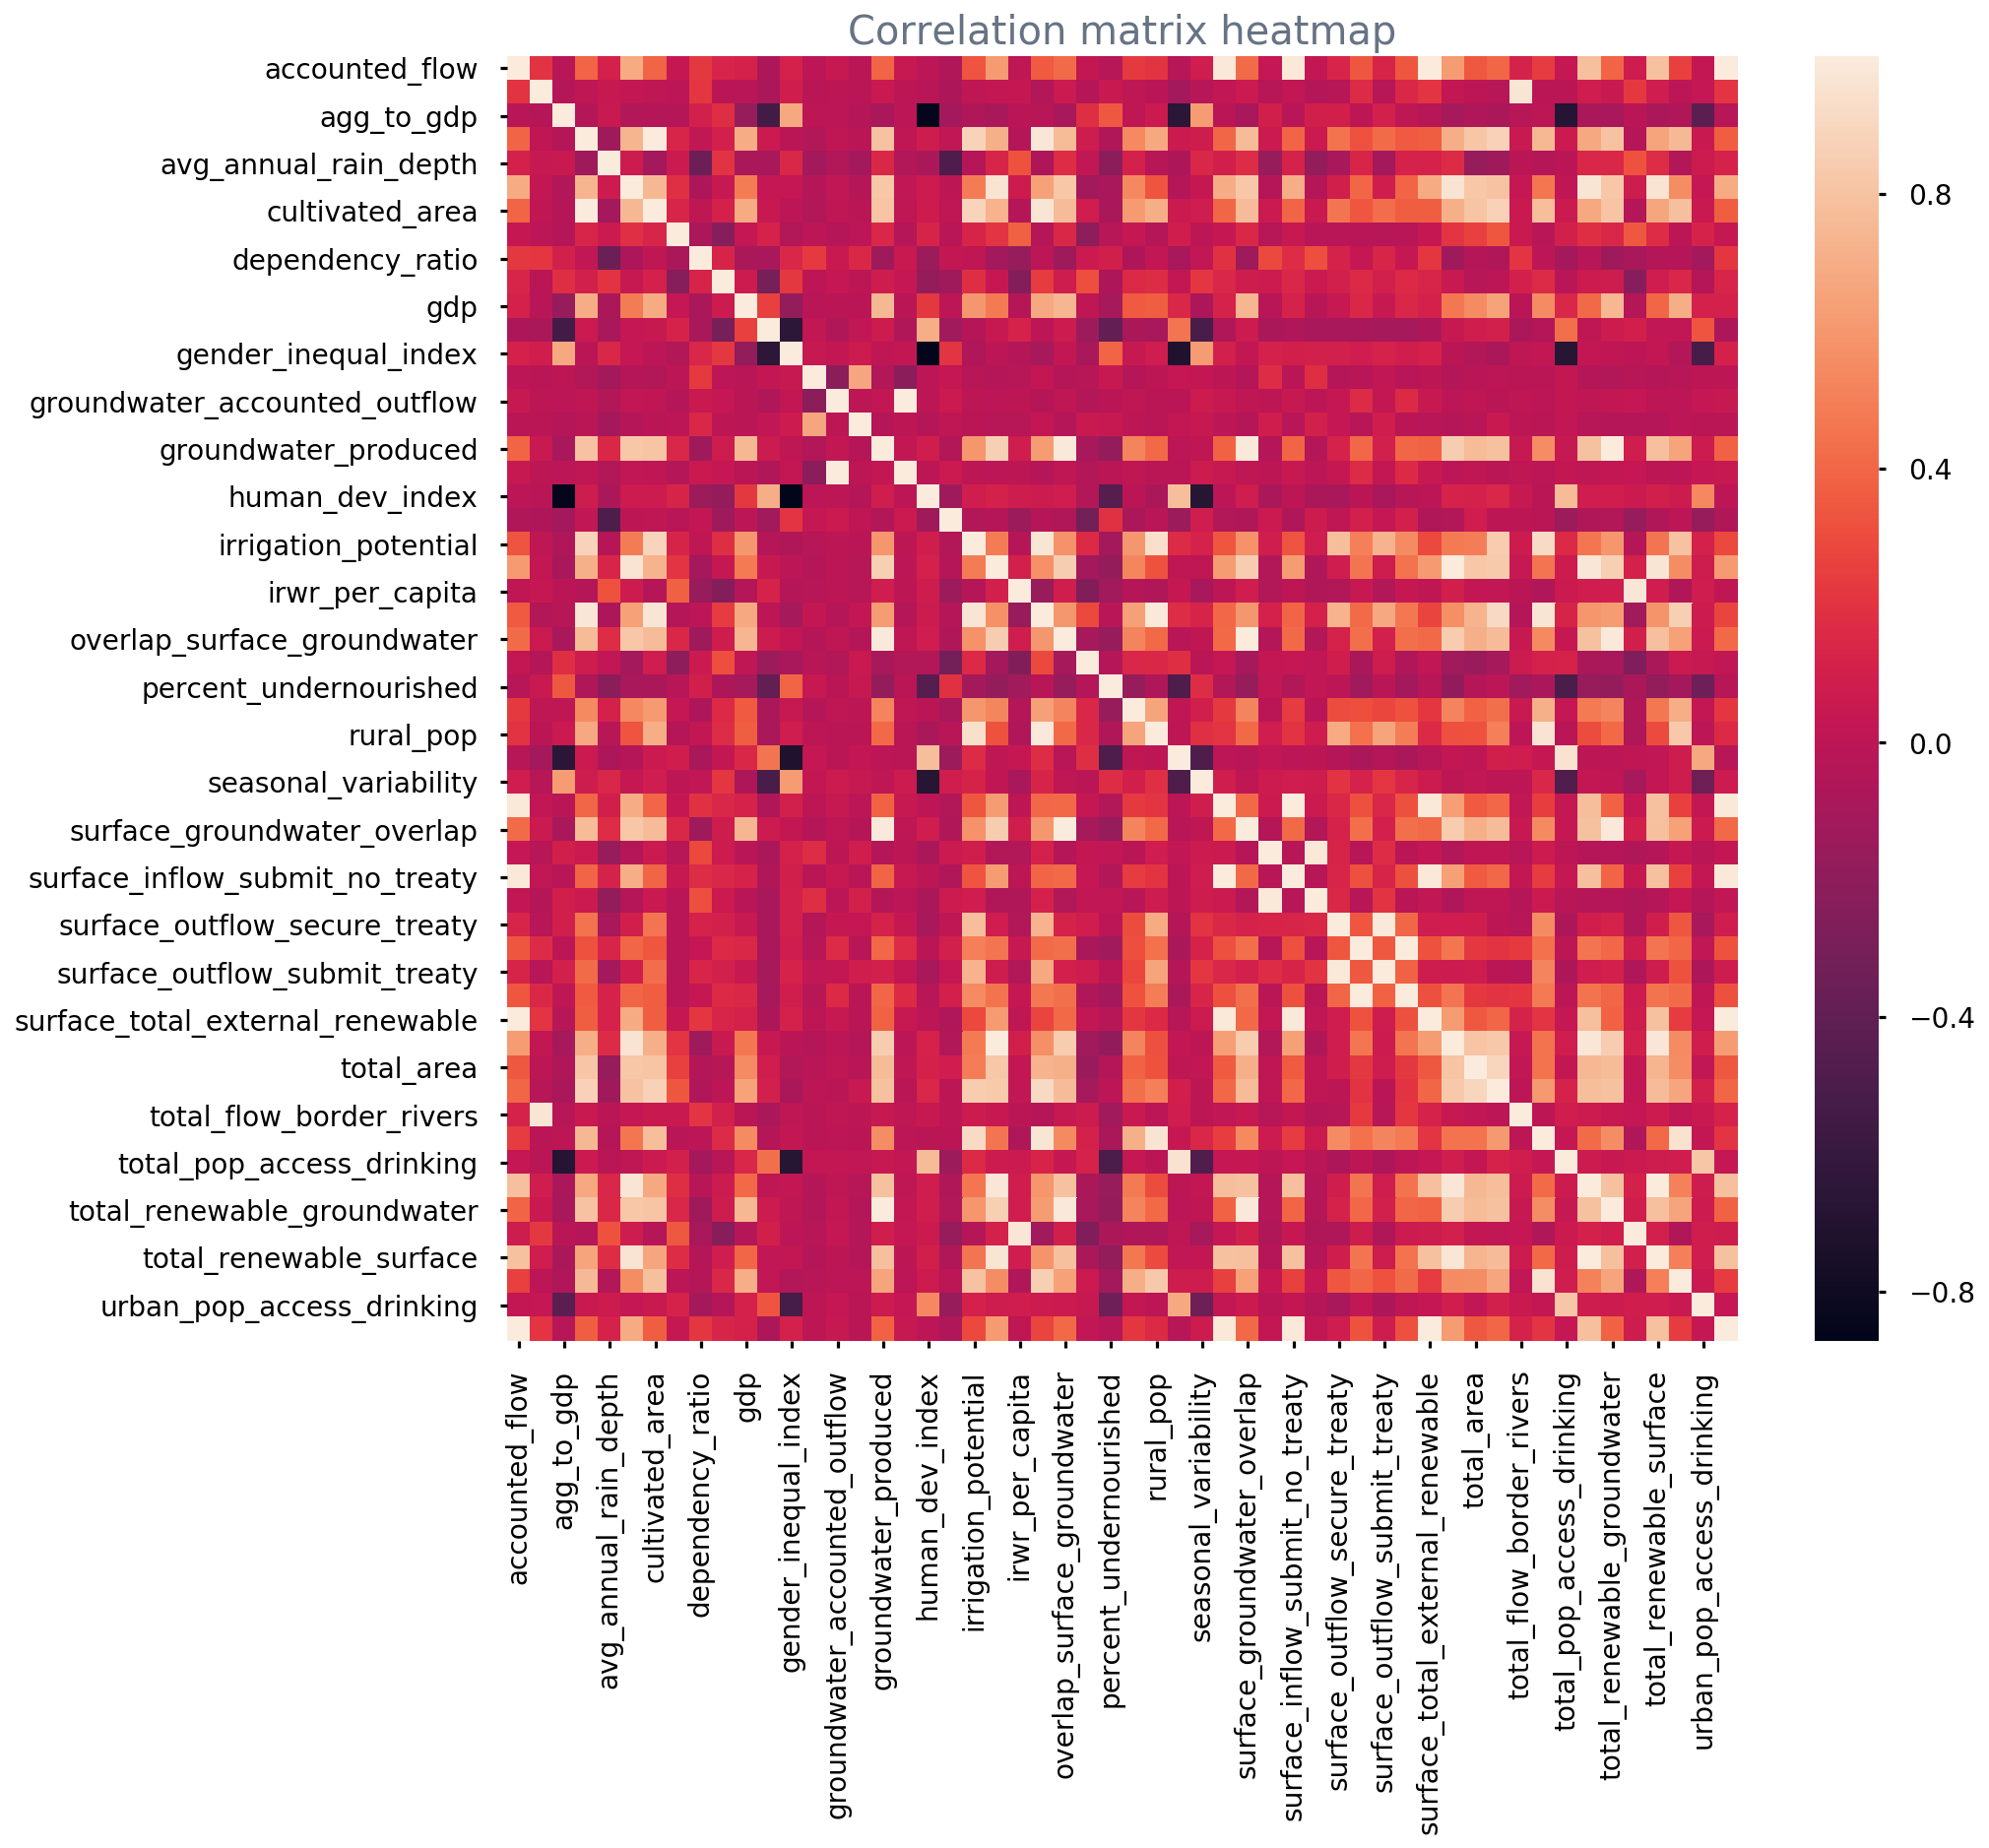

In [6]:
fig, ax = plt.subplots(figsize=(14,12));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation matrix heatmap');

**To do**: Choose high correlation combinations to explore further.

# Bivariate visualizations of each combination of variables

Do it yourself: 

In [ ]:
var1 = 
var2 = 

In [ ]:
g = sns.jointplot(var1, var2, recent, kind="hex", gridsize=15)

# Pair plots

In [ ]:
variables_to_plot = []

In [ ]:
sns.set(style="ticks", color_codes=True);
sns.pairplot(recent[variables_to_plot].dropna());